In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Loading the data
hazlenuts_rawdata = pd.read_csv("dataset/hazlenuts.txt", delimiter='\t',encoding='latin1', na_values="n/a", index_col = 0)
hazlenuts_rawdata.head()

,72,1,73,2,136,74,75,3,137,138,...,67,68,197,69,135,198,199,70,200,201
71,,,,,,,,,,,,,,,,,,,,,
11.67,13.86,20.53,14.13,15.85,21.11,25.13,15.41,16.09,19.78,22.19,...,17.57,18.33,13.33,13.76,11.37,9.02,17.62,15.85,21.83,21.13
12.8025,13.0995,15.5925,12.222,14.724,17.4105,16.9785,13.8285,14.211,16.173,16.578,...,15.1695,15.3945,13.356,14.1975,13.4145,12.9555,15.2415,14.175,17.559,17.514
8.055074738,7.349906812,9.565426582,7.182948645,8.622661318,9.680494488,9.931461322,8.078300047,8.16274649,9.75182248,9.920309777,...,9.098228491,9.469039277,7.875741111,7.960626109,8.149840497,7.572287267,8.850863182,8.861027239,9.828308399,9.837131822
34.65,38.1,49.89,35.43,43.29,56.25,60.48,39.96,42.03,51.78,56.16,...,46.47,48.57,37.65,41.4,36.57,33.69,48.51,41.82,57.39,58.38
1375.5,1439.55,1623.3,1412.25,1512,1698.9,1788.15,1463.7,1500.45,1651.65,1715.7,...,1568.7,1591.8,1424.85,1474.2,1386,1326.15,1614.9,1487.85,1712.55,1732.5


In [3]:
#Ordering data by naming columns and creating index
unindexed_data = hazlenuts_rawdata.T
unindexed_data.head()
unindexed_data.columns = ['Length','width', 'thickness', 'surface_area', 'mass', 'compactness', 'hardness', 'shell_top_radius', 'water_content', 'carbohydrate_content', 'variety']
unindexed_data.reset_index(inplace=True)
df = unindexed_data.drop('index', axis=1)
df.head()

,Length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,13.86,13.0995,7.349906812,38.1,1439.55,0.93401,8.78,4.7844,0.048826089,0.167,c_avellana
1,20.53,15.5925,9.565426582,49.89,1623.3,0.96217,5.12,5.2893,0.049521325,0.174,c_americana
2,14.13,12.222,7.182948645,35.43,1412.25,0.90178,13.694,4.8168,0.049594663,0.167,c_avellana
3,15.85,14.724,8.622661318,43.29,1512,0.96261,10.925,4.6296,0.050384315,0.173,c_americana
4,21.11,17.4105,9.680494488,56.25,1698.9,0.98989,11.564,5.3928,0.050905478,0.17,c_cornuta


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
#Standardizing all the features
scaler = StandardScaler() 

In [6]:
scaler.fit(df.drop('variety', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaledfeatures = scaler.transform(df.drop('variety', axis = 1))

In [8]:
scaledfeatures.shape

(200, 10)

In [9]:
#Feature Extraction for training
df_features = pd.DataFrame(scaledfeatures, columns = df.columns[:-1])

In [10]:
df_features.head()

,Length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content
0,-0.553085,-0.953393,-1.348758,-0.758676,-0.666070,-0.993078,-0.269580,-0.172495,-1.693256,-1.293885
1,0.988301,0.530863,0.933805,0.610694,0.694684,0.110989,-1.080075,0.988303,-1.647017,1.144122
2,-0.490690,-1.475830,-1.520768,-1.068788,-0.868239,-2.256716,0.818609,-0.098006,-1.642140,-1.293885
3,-0.093211,0.013784,-0.037489,-0.155875,-0.129544,0.128240,0.205423,-0.528391,-1.589622,0.795835
4,1.122334,1.613244,1.052355,1.349387,1.254537,1.197804,0.346928,1.226256,-1.554961,-0.249025


In [11]:
from sklearn.model_selection import train_test_split

In [13]:
#Creating training and test data
X = np.array(df_features)
y = np.array(df['variety'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
variety_names_set = set(df['variety'])
variety_names = list(variety_names_set)
print(variety_names)

['c_cornuta', 'c_americana', 'c_avellana']


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
#Program to print heatmap for a confusion matrix
def print_confusion_matrix(confusion_matrix, class_names, fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return heatmap

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [17]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean()) 
error = np.array(1)-np.array(cv_scores)
error = error.tolist()
print("Cross Validation Scores\n",cv_scores)
print("Error scores\n",error)
k = error.index(min(error))*2 +1
print("The value of n is", k)
print("Accuracy",max(cv_scores)*100)

Cross Validation Scores
 [0.8666666666666668, 0.9, 0.8933333333333333, 0.8800000000000001, 0.8866666666666667, 0.8866666666666667, 0.9, 0.8866666666666667, 0.8799999999999999, 0.9, 0.9, 0.8933333333333332, 0.8866666666666665, 0.8933333333333332, 0.8866666666666665, 0.8933333333333333, 0.8866666666666665, 0.8933333333333333, 0.8866666666666667, 0.8866666666666667, 0.8866666666666667, 0.8933333333333333, 0.9, 0.8933333333333333, 0.9]
Error scores
 [0.1333333333333332, 0.09999999999999998, 0.10666666666666669, 0.11999999999999988, 0.11333333333333329, 0.11333333333333329, 0.09999999999999998, 0.11333333333333329, 0.1200000000000001, 0.09999999999999998, 0.09999999999999998, 0.1066666666666668, 0.11333333333333351, 0.1066666666666668, 0.11333333333333351, 0.10666666666666669, 0.11333333333333351, 0.10666666666666669, 0.11333333333333329, 0.11333333333333329, 0.11333333333333329, 0.10666666666666669, 0.09999999999999998, 0.10666666666666669, 0.09999999999999998]
The value of n is 3
Accuracy

[[15  3  2]
 [ 3 11  0]
 [ 1  0 15]]


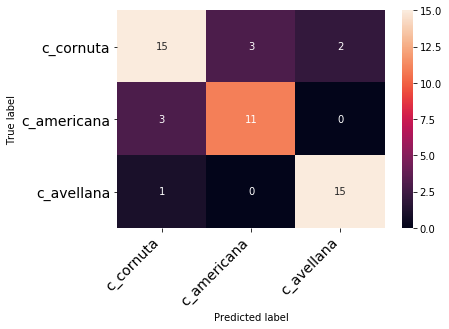

In [18]:
#Printing confusion matrix for kNN
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
cm = confusion_matrix(y_test, prediction)
print(cm)
print_confusion_matrix(cm, variety_names)

Text(0.5, 1.0, 'Error Rate vs K Value')

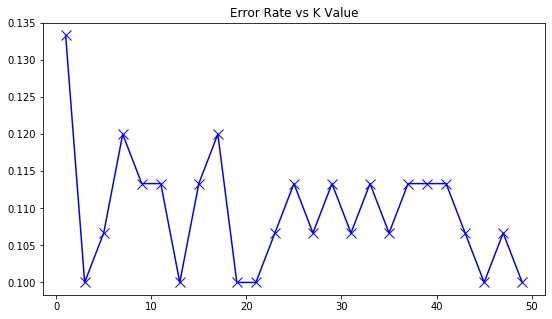

In [19]:
#Plotting k against error rate
plt.figure(figsize=(9,5))
plt.plot(neighbors, error, color= 'blue', marker='x', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')

In [ ]:
#Pair plot to visualize the data
sns.pairplot(data=df, hue='variety')

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#K fold cross validation on Gaussian Model
nbmodel = GaussianNB()

In [ ]:
scores = cross_val_score(nbmodel, X_train, y_train, cv=10, scoring='accuracy')

In [ ]:
print(scores)
print("Accuracy",round(scores.mean()*100))

In [ ]:
#Heat map for confusion matrix
nbmodel.fit(X_train, y_train)
prediction = nbmodel.predict(X_test)
cm = confusion_matrix(prediction, y_test)

In [ ]:
print_confusion_matrix(cm, variety_names)